# Business Case Study: Employee Performance Analysis

A company’s workforce is one of the great advantages a business can have. The people of an organization are the ones who get the work done and help businesses accomplish missions and objectives. As such, employee evaluations can let managers gauge how well employees are developing their professional potential and contributing to significant organizational achievements.

<ul>
    <li>Employee Performance Issues</li>
</ul>    
The data used for the analysis derive from the Sample IBM Dataset available in Kaggle.com 

<center><i>You don't build a business. You build people, and people build the business." - Zig Ziglar</i></center>

<b><hr></b></hr>

## Section 1: Employee Performance

<u>Introduction</u>

Companies conduct performance evaluations to recognize achievements, evaluate job progress and design training to further develop the employees' skills and strengths. 

<ol>
    <li><b>Recurrent evaluations</b> help you understand the abilities of each employee and promote your employees’ interests. These reviews also augment an employee's on-the-job performance. </li>
    <li><b>Evaluations provide formal feedback mechanisms,</b> often on an annual basis. You can, however, review your employees more frequently as you need not restrict the process to only formal annual reviews. </li>
</ol>    

Performance analysis and evaluations provide structure for professional advancement. You can use performance analysis and evaluations to judge the level of work given by your employees and their diligence to your company’s mission and goals.


<u>The Employee Performance Metrics</u>

There are various kinds of employee performance metrics. We can split them up into four main categories.

<ol>
    <li><b>Work quality metrics</b> -  The best-known metric is subjective appraisal by the direct manager. </li>
    <li><b>Work quantity metrics</b> - Examples: Number of units produced, Number of sales, Handling time, first-call resolution.</li>
    <li><b>Work efficiency metrics</b> - Examples: Revenue per employee, Profit per FTE, Human Capital ROI.</li>

        

This notebook is structured as follows:

<p> <li><b>Exploratory Data Analysis</b> : In this section, we explore the dataset by taking a look at the feature distributions, how correlated one feature is to the other and create some Seaborn and Plotly visualisations.</p>
    
 <p><li><b>Feature Engineering and Categorical Encoding</b> : Conduct some feature engineering as well as encode all our categorical features into dummy variables.</p>
     
 <p><li><b>Implementing Machine Learning models</b> : We implement a Random Forest and a Gradient Boosted Model after which we look at feature importances from these respective models</p>

<u>Business Problem</u>

Our friends company is experience low performance levels in crucial departments for the organizations. 

<ol><li>Trace the <b>true causes behind low employee performance.</b></li>
    <li>Recommend <b>solutions and procedures</b> that should be applied by the organization</li>
    <li>Assess<b> the impact that Trainings applied from the organization had on their performance
</ol>
        

<u>Client</u>

Our Friend Mark

<u>Objective</u>

The company wants to understand what factors contributed most to low employee performance levels, assess the ongoing situation and recommend solutions. 

Overall, the implementation of this model will allow management to create better decision-making actions.

<u>OSEMN Pipeline</u>

I’ll be following a typical data science pipeline, which is call “OSEMN” (pronounced awesome).
<ol>
    <li><p><b>O</b>btaining the data is the first approach in solving the problem.</p>

<li><p><b>S</b>crubbing or cleaning the data is the next step. This includes data imputation of missing or invalid data and fixing column names.</p>

<li><b>E</b>xploring the data will follow right after and allow further insight of what our dataset contains. Looking for any outliers or weird data. Understanding the relationship each explanatory variable has with the response variable resides here and we can do this with a correlation matrix.

<li><b>M</b>odeling the data will give us our predictive power on whether an employee will leave.

<li><b>I</b>nterpreting the data is last. With all the results and analysis of the data, what conclusion is made? What factors contributed most to employee turnover? What relationship of variables were found?


<u><b>Note</u></b>: The data was found from the “Human Resources Analytics” dataset provided by Kaggle’s website. https://www.kaggle.com/ludobenistant/hr-analytics

<hr></hr>

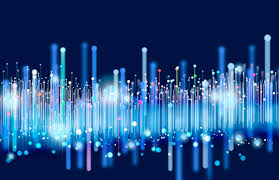

## Part 1: Obtaining the data

In [40]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# Import the neccessary modules for data manipulation and visual representation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

In [3]:
from pandas import read_csv
data = read_csv("/Users/konstantinosanastasiadis/Coursera Notebooks Python/Python Data Analytics/hrdataset.csv")

<img src="https://cdn.lynda.com/course/661750/661750-637286234078947483-16x9.jpg" width="750" align="center">

## Part 2: Scrubbing the data

<i>Typically, cleaning the data requires a lot of work and can be a very tedious procedure. This dataset from Kaggle is super clean and contains no missing values. But still, I will have to examine the dataset to make sure that everything else is readable and that the observation values match the feature names appropriately.</i>

In [4]:
data.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

<i><b>Initial Overview of the Dataset - Let us go throgh some functions and get an overview of how are dataset is designed</i></b>

In [42]:
data.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,0,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,59,0,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
7,30,0,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
8,38,0,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
9,36,0,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7


In [6]:
# Display the statistical overview of the employees
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


<img src="https://www.synergita.com/blog/wp-content/uploads/2019/06/differentiate-employee-perforamnce-mangement-vs-performance-appraisal-626x400.jpg" width="750" align="center">

<u>Demographic and Quick insights</u>

Based on the quick <b>data.describe</b> method we can have a quick overview of our dataset. The following can be traced wihin our dataframe. 
<ol>
    <li> <b>Age</b>: Our average employee is around 36 years old while 70% of our employees within the sample have an average age of 43
    <li> <b>Distance from Home</b>: Around 9km - this is the average distance that our employee is from the offices
    <li> <b>TotalWorkingYears & Years at company in healthy levels</b> Majority of the employees 75th percentile has a work experience of 15 years with the majority of their experience existing within the current organization 
     <li> <b>YearsSinceLastPromotion healthy levels</b>Between 3-4 years majority of the employees are being promoted to higher levels within the organization - indicating a healthy environment with a flexible rotation. 
</ol>
<u>Employee Evaluation 1-4 Scale</u>
<ol>
    <li> <b>Relationship Satisfaction,Environment Satisfaction, Job Involvement,Work/Life balance High Level</b>Majority of the employees on the 75th Percentile rates as 4 with the 50th Percentile rating it at 3 indicating a healthy workforce as an initial overview
  </ol>
<u>Employee Trainings 1-4 Scale</u>
<ol>
   <li> <b> Training Times last year</b>, the mean index is 2,7 showcasing that for the year past the average employee participated in almost 3 trainings. With a st.deviation of 1.28 there is not a strong differentiation from the mean.  
    <li>Further exploration is needed through the given variable and its relation of course with other factors such as employee performance, years since last promotion and employee satisfaction. 
</ol>

<u>Overall Conclusions</u>
<ol>
<li><b>Demographic</b>:Majority of the employees have been with the organization for a long period of time and and almost 60% of their work experience derives from it. 
<li><b>Perception to the Organization</b>: There is a positive outlook through all the pillars which is still pending to be further explored (Relationship Satisfaction, Environment Satisfaction and Job involvement) 
</ol>    
 <u>However</u>
 <p>We have to further explore the correlations between those indicators and the employees that left the organization
    <li>Training - How many training have been provided and has this lead to people living? 
    <li>Outliers - Do the extreme values in our indicators correlate with people living the organization? 
    <li> Limits - Is there some limit that when this is surpassed leads our employees to leaving the organization? 


<img src="https://www.upraizal.com/wp-content/uploads/2019/10/emp-performance.png" width="750" align="center">

## Part 3: Exploring the Data

### <b>3a: Statistical Overview</b>

In [7]:
data.Attrition = pd.Categorical(data.Attrition).codes

In [8]:
# The dataset contains 10 columns and 14999 observations
data.shape

(1470, 35)

In [9]:
# Check the type of our features. 
data.dtypes

Age                          int64
Attrition                     int8
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [10]:
#overview of the Scale that performance rating has
data.PerformanceRating.unique()

array([3, 4])

In [11]:
# NOTE: When performing cross validation, its important to maintain this  ratio
PerformanceRating_Rate = data.PerformanceRating.value_counts() / len(data)
PerformanceRating_Rate

3    0.846259
4    0.153741
Name: PerformanceRating, dtype: float64

<u>Fact:</u> 
<p>About <b>84% of employees have performance level 3</b> while <b>15% 
have performance level 4.</b> 


In [12]:
# Overview of summary (Turnover V.S. Non-turnover)
PerformanceRating_Summary = data.groupby('PerformanceRating')
PerformanceRating_Summary.mean()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
PerformanceRating,,,,,,,,,,,,,,,,,,,,,
3,36.916399,0.160772,802.404341,9.098875,2.923633,1.0,1030.087621,2.735531,65.909968,2.738746,...,2.726688,80.0,0.792605,11.257235,2.807878,2.760450,6.999196,4.175241,2.163183,4.088424
4,36.964602,0.163717,802.933628,9.707965,2.853982,1.0,996.119469,2.646018,65.787611,2.681416,...,2.632743,80.0,0.800885,11.402655,2.752212,2.765487,7.057522,4.526549,2.323009,4.314159


Going through really quick through the Turnover Summary dataframe:
    <li>Employees that leave the organization were <b>payed less, had a low evaluation through both the Work/Life balance and Work-related indicators</b></li>
<li>However, it seems that these employees were <b>performing better</b>with a small difference (+0,003) than those who remained further exploration is to be done</li>

### <b>3b: Correlation Matrix & Heatmap</b>

Moderate Positively Correlated Features:

<li>PerformanceRating vs JobSatisfaction: 0.002299
<li>JobSatisfaction vs Monthly Salary: 0.002297
<li>Moderate Negatively Correlated Feature:

JobSatisfaction vs attrition: -0.103
PerformanceRating vs Monthly Salary: -0.002347

Stop and Think:

What features affect our target variable the most (turnover)?
What features have strong correlations with each other?
Can we do a more in depth examination of these features?
Summary:

From the heatmap, there is a positive(+) correlation between PerformanceRating, averageMonthlyHours, and evaluation. Which could mean that the employees who spent more hours  were evaluated highly.

For the negative(-) relationships, turnover and satisfaction are highly correlated. I'm assuming that people tend to leave a company more when they are less satisfied.

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.031373,NaN,-0.010577,-0.103369,-0.006846,-0.130016,...,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
DailyRate,0.010661,-0.056652,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.010577,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,-0.103369,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,-0.006846,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,-0.130016,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976


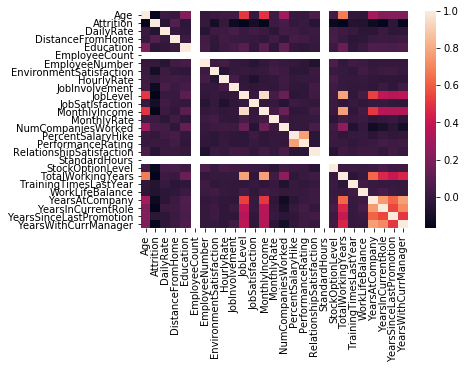

In [13]:
#Correlation Matrix
corr = data.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

corr

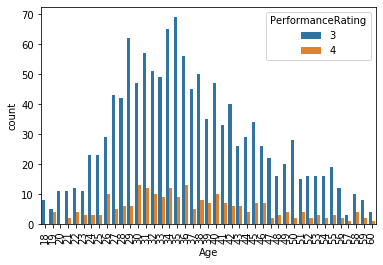

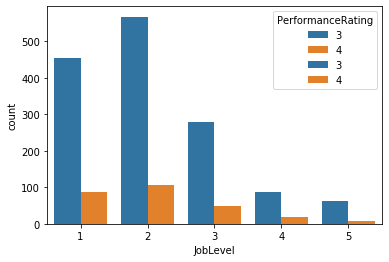

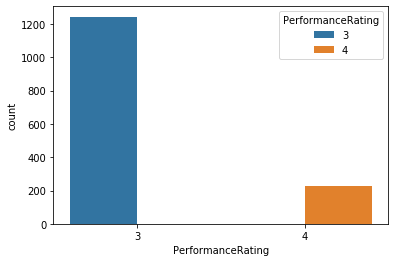

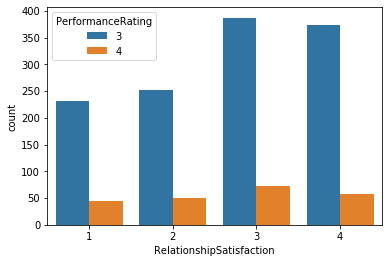

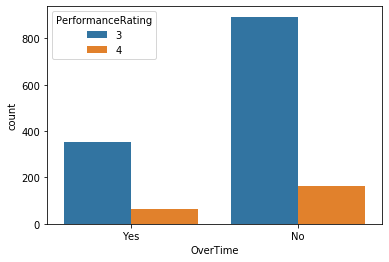

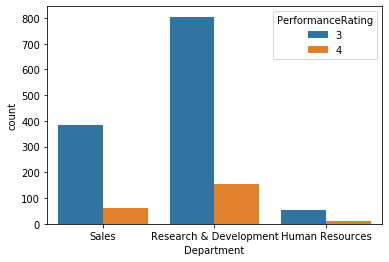

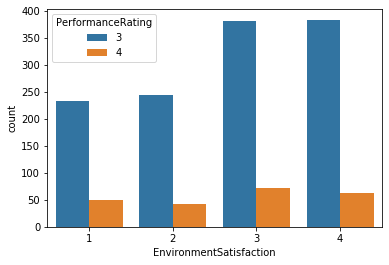

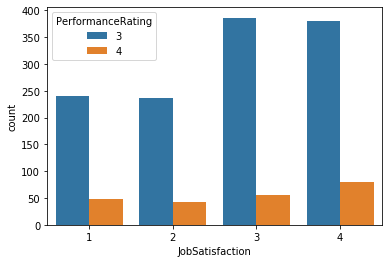

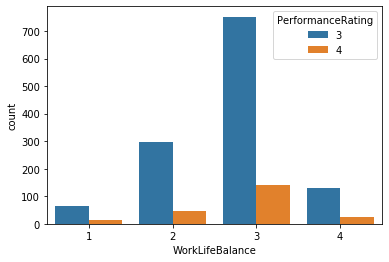

<Figure size 432x288 with 0 Axes>

In [14]:
#Count Plot

#Age vs Training Times since last year


sns.countplot(x=data['Age'], hue="PerformanceRating", data=data) 
plt.xticks( rotation=90)
plt.show()

#Multiple Count plots
#Marital status,Performace rating, Job Level,   Relationship Satisfaction, Over Time, Department, Environmental Satisfaction , job Satisfaction, Work life Balace




# create a data frame to store all required columns

data_df1=pd.DataFrame(data[['MaritalStatus','PerformanceRating','JobLevel','RelationshipSatisfaction','OverTime','Department','EnvironmentSatisfaction','JobSatisfaction','WorkLifeBalance']])

for i, col in enumerate(data_df1.columns):
	sns.countplot(x=col, hue='PerformanceRating',data=data)	
	plt.figure(i)

<u>Pair Plots Insights </u>
<p><li>The more the satisfaction with the work environment the higher the performance.
   <li>Across all departments performance rating is at great majority at 3, with the greatest gap being found in the R&D department, in which there is 650 people gap. 
    <li>The golden rate for work life balance is at three,that is at this level the highest amount of employee performance can be found.
    <li> The greater the job satisfaction the greater the employee performance   

<b>Observation: Attrition rate is more for Job level 1 & 2 and in Reaserch Department. Midlevel Age group 25-35 has major attrition rate.</b>

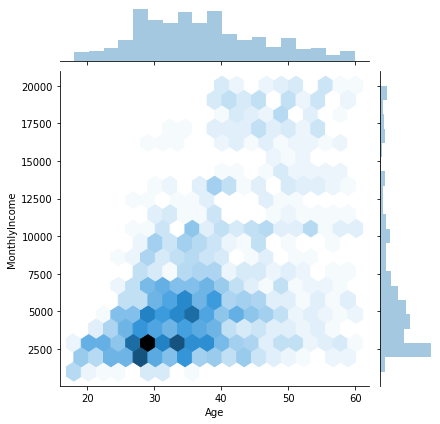

In [15]:
# joint Plots
sns.jointplot(data.Age,data.MonthlyIncome, kind = "hex")   
plt.show()

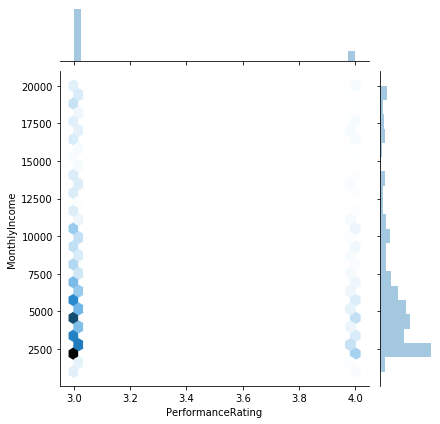

In [16]:
# joint Plots
sns.jointplot(data.PerformanceRating,data.MonthlyIncome, kind = "hex")   
plt.show()

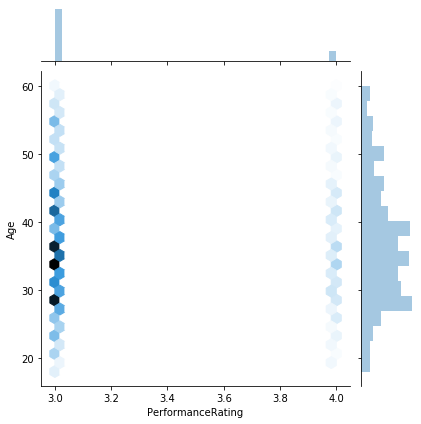

In [29]:
# joint Plots
sns.jointplot(data.PerformanceRating,data.Age, kind = "hex")   
plt.show()

<u> Reward System Issues </u>

Reviewing the distribution of the joint plots, it is clear to claim the following: 
<p><li>Employees with a <b>performance rating of 3 tend to have a higher monthly income</b> than the employees that are performing on a higher level    
    <li>Issue with the payment system that tends to lead the Organization's HiPos to exit.

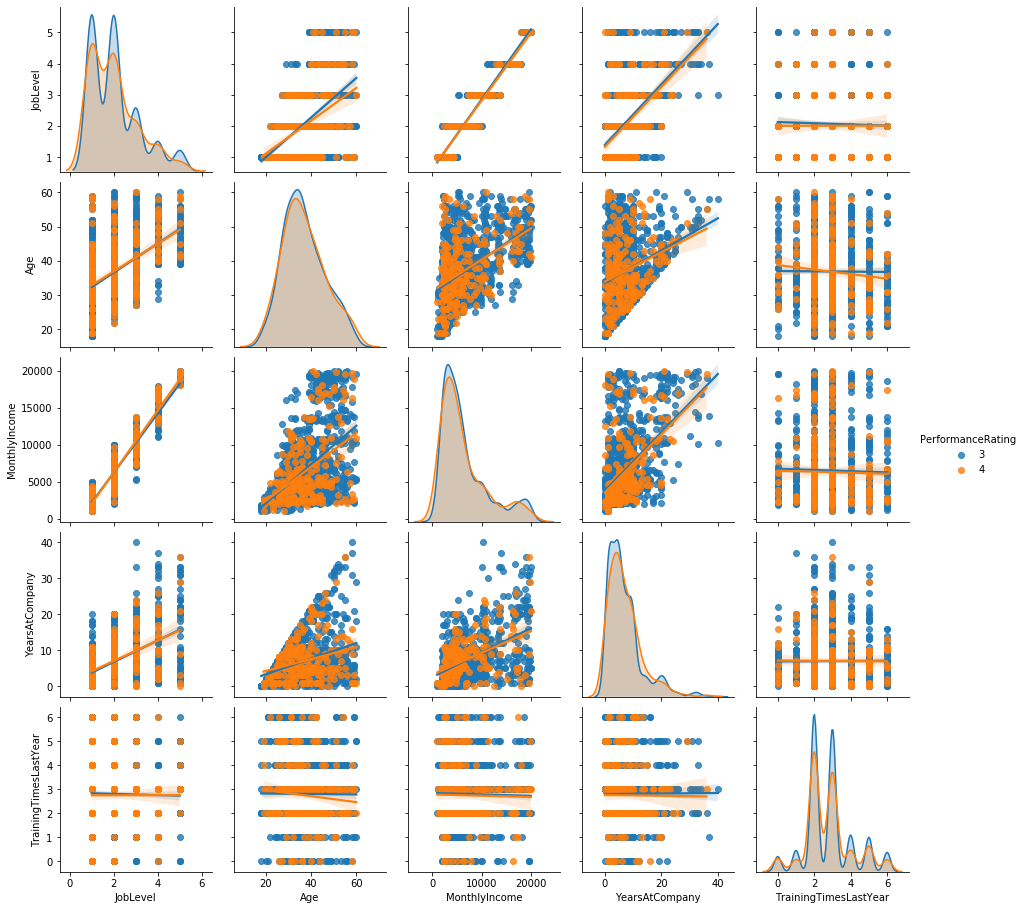

In [17]:
#Pair Plots
cont_col= ['PerformanceRating','JobLevel','Age','EducationField','MonthlyIncome','YearsAtCompany','TrainingTimesLastYear']
sns.pairplot(data[cont_col],  kind="reg", diag_kind = "kde"  , hue = 'PerformanceRating' )
plt.show()

<u>Pair Plots Insights </u>
<p><li><b>The higher the performance level the higher the position</b> the employyes have within the organization (Job Level)
<li><b>Years in the organization does not equal HiPo Employees</b> on the contrary employees that are relatively new to the organization no more than 4 years tend to perform higher
 <li><b>The "golden" training times number for the last year is 3</b> despite the job level the high performers are the ones that received 2-3 training last year

/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


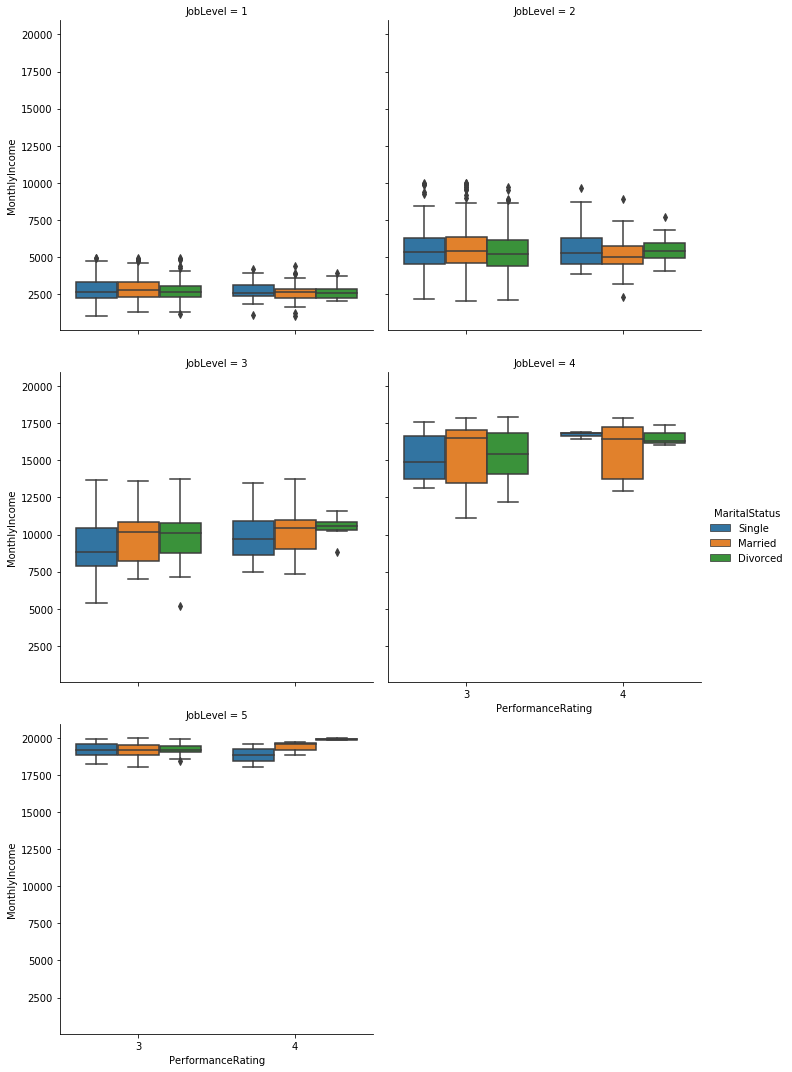

In [18]:
#Factor plots
sns.factorplot(x =   'PerformanceRating',
               y =   'MonthlyIncome',
               hue = 'MaritalStatus',
               col=  'JobLevel',   
               col_wrap=2,           # Wrap facet after two axes
               kind = 'box',
               data = data)
plt.show()

### <b>3c: Statistical Test for Correlation</b>

One-Sample T-Test (Measuring Satisfaction Level)
A one-sample t-test checks whether a sample mean differs from the population mean. Since satisfaction has the highest correlation with our dependent variable turnover, let's test to see whether the average satisfaction level of employees that had a turnover differs from the those that had no turnover.

Hypothesis Testing: Is there significant difference in the means of satisfaction level between employees who had a turnover and temployees who had no turnover?

<li>Null Hypothesis: (H0: pTS = pES) The null hypothesis would be that there is no difference in satisfaction level between employees who did turnover and those who did not..

<li>Alternate Hypothesis: (HA: pTS != pES) The alternative hypothesis would be that there is a difference in satisfaction level between employees who did turnover and those who did not..

In [19]:
# Let's compare the means of our employee turnover satisfaction against the employee population satisfaction
#emp_population = df['satisfaction'].mean()
emp_population = data['PerformanceRating'][data['TrainingTimesLastYear'] == 0].mean()
emp_turnover_satisfaction = data[data['TrainingTimesLastYear']==1]['PerformanceRating'].mean()

print( 'The mean satisfaction for the employee population with no turnover is: ' + str(emp_population))
print( 'The mean satisfaction for employees that had a turnover is: ' + str(emp_turnover_satisfaction) )

The mean satisfaction for the employee population with no turnover is: 3.185185185185185
The mean satisfaction for employees that had a turnover is: 3.1267605633802815


Let's conduct a t-test at 95% confidence level and see if it correctly rejects the null hypothesis that the sample comes from the same distribution as the employee population. To conduct a one sample t-test, we can use the stats.ttest_1samp() function:

In [20]:
import scipy.stats as stats
stats.ttest_1samp(a=  data[data['Attrition']==1]['JobSatisfaction'], # Sample of Employee satisfaction who had a Turnover
                  popmean = emp_population)  # Employee Who Had No Turnover satisfaction mean

Ttest_1sampResult(statistic=-9.870211958153106, pvalue=1.8548773149958916e-19)

T-Test Result

The test result shows the test statistic "t" is equal to -9.87. This test statistic tells us how much the sample mean deviates from the null hypothesis. If the t-statistic lies outside the quantiles of the t-distribution corresponding to our confidence level and degrees of freedom, we reject the null hypothesis. We can check the quantiles with stats.t.ppf():

T-Test Quantile

If the t-statistic value we calculated above (-51.33) is outside the quantiles, then we can reject the null hypothesis

In [21]:
degree_freedom = len(data[data['Attrition']==1])

LQ = stats.t.ppf(0.025,degree_freedom)  # Left Quartile

RQ = stats.t.ppf(0.975,degree_freedom)  # Right Quartile

print ('The t-distribution left quartile range is: ' + str(LQ))
print ('The t-distribution right quartile range is: ' + str(RQ))

The t-distribution left quartile range is: -1.9700240104025675
The t-distribution right quartile range is: 1.970024010402567


<hr></hr>

3c. Distribution Plots (Satisfaction - Evaluation - AverageMonthlyHours)

Summary: Let's examine the distribution on some of the employee's features. Here's what I found:

<li>Satisfaction - There is a huge spike for employees with low satisfaction and high satisfaction.
<li>Evaluation - There is a bimodal distrubtion of employees for low evaluations (less than 0.6) and high evaluations (more than 0.8)
<li>AverageMonthlyHours - There is another bimodal distribution of employees with lower and higher average monthly hours (less than 150 hours & more than 250 hours)
<li>The evaluation and average monthly hour graphs both share a similar distribution.
<li>Employees with lower average monthly hours were evaluated less and vice versa.
If you look back at the correlation matrix, the high correlation between evaluation and averageMonthlyHours does support this finding.

Stop and Think:

Is there a reason for the high spike in low satisfaction of employees?
Could employees be grouped in a way with these features?
Is there a correlation between evaluation and averageMonthlyHours?

Text(0, 0.5, 'Employee Count')

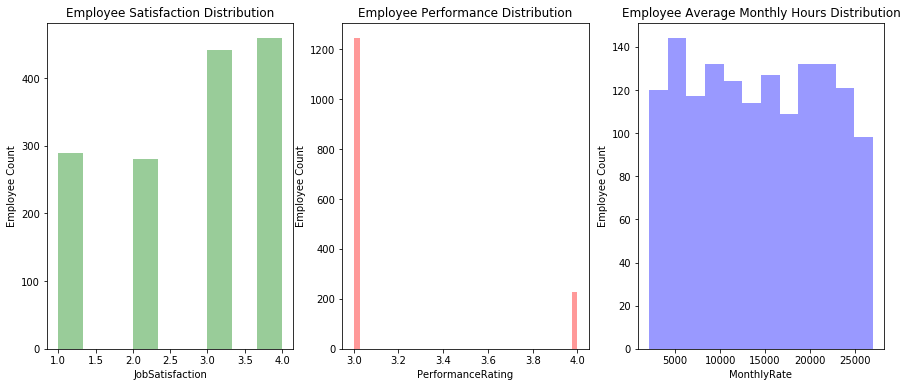

In [22]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols=3, figsize=(15, 6))

# Graph Employee Satisfaction
sns.distplot(data.JobSatisfaction, kde=False, color="g", ax=axes[0]).set_title('Employee Satisfaction Distribution')
axes[0].set_ylabel('Employee Count')

# Graph Employee Evaluation
sns.distplot(data.PerformanceRating, kde=False, color="r", ax=axes[1]).set_title('Employee Performance Distribution')
axes[1].set_ylabel('Employee Count')

# Graph Employee Average Monthly Hours
sns.distplot(data.MonthlyRate, kde=False, color="b", ax=axes[2]).set_title('Employee Average Monthly Hours Distribution')
axes[2].set_ylabel('Employee Count')

3e. Department VS PerformanceRating
Summary: Let's see more information about the departments. Here's what I found:

The sales, technical, and support department were the top 3 departments to have employee turnover
The management department had the smallest amount of turnover
Stop and Think:

If we had more information on each department, can we pinpoint a more direct cause for employee turnover?

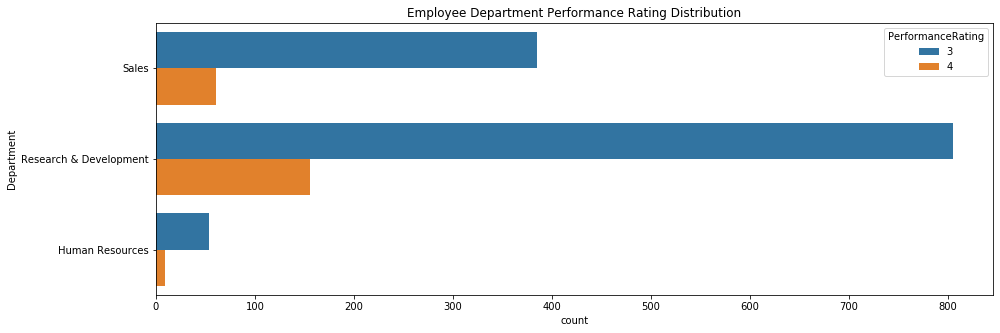

In [23]:
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(y="Department", hue='PerformanceRating', data=data).set_title('Employee Department Performance Rating Distribution');

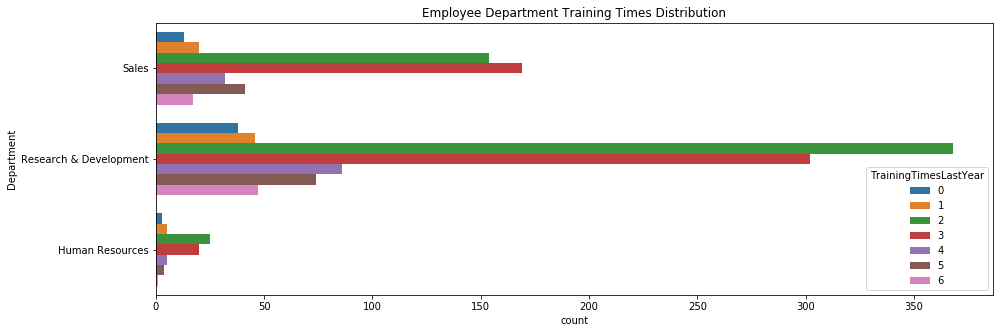

In [24]:
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(y="Department", hue='TrainingTimesLastYear', data=data).set_title('Employee Department Training Times Distribution');

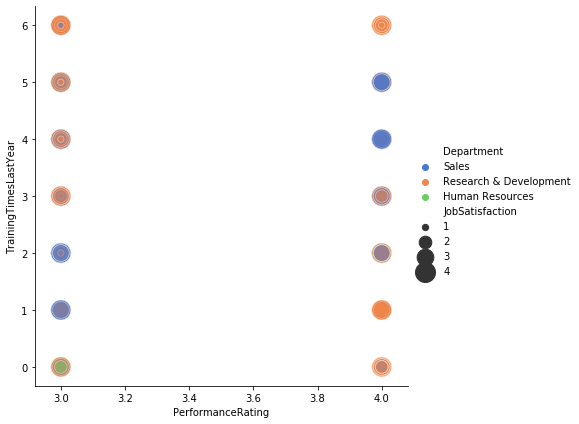

In [38]:
sns.relplot(x="PerformanceRating", y="TrainingTimesLastYear", hue="Department", size="JobSatisfaction",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=data)

<u>Key Insights</u>
<li>The R&D department seems to have the greatest gap of low and higher performers</li>
<li>Human Resources seems to have the lowest gap of low and higher performers</li>
<li>Greater focus on training design and development is needed for the Sales department primarily since its high performers have attended more training programs

3j. PerformanceRating VS AverageMonthlyHours
Summary:

As project count increased, so did average monthly hours
Something weird about the boxplot graph is the difference in averageMonthlyHours between people who had a turnver and did not.
Looks like employees who did not have a turnover had consistent averageMonthlyHours, despite the increase in projects
In contrast, employees who did have a turnover had an increase in averageMonthlyHours with the increase in projects
Stop and Think:

What could be the meaning for this?
Why is it that employees who left worked more hours than employees who didn't, even with the same project count?

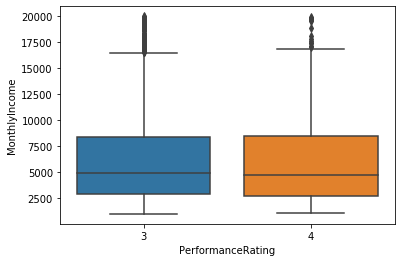

In [30]:
#PerformanceRating VS Monthly Income [BOXPLOT]
#Looks like the average employees who stayed had a monthly income of about 5.000-10.000. Those that had a turnover were being less payed in both performance levels by 3.000-4.000

import seaborn as sns
sns.boxplot(x="PerformanceRating", y="MonthlyIncome", data=data)

<u>Potential Solution</u>
<p>Binary Classification: Turnover V.S. Non Turnover

Instance Scoring: Likelihood of employee responding to an offer/incentive to save them from leaving.

<u>Solution 1</u>:
We allocate our incentive budget to the instances with the highest expected loss, for which we'll need the probability of turnover.
 
    
<u>Solution 2</u>:
    Develop learning programs for managers. Then use analytics to gauge their performance and measure progress. Programs that focus on employee well being and constructive performance management procedures are also a recommended path. 

## Let's Connect!
If anybody would like to discuss any other projects or just have a chat about data science topics, I'll be more than happy to connect with you on:

LinkedIn: https://www.linkedin.com/in/konstantinos-anastasiadis/

My Website: https://anastasiadiskonstantinos.com/

This notebook will always be a work in progress. Please leave any comments about further improvements to the notebook! Any feedback or constructive criticism is greatly appreciated. 

Anastasiadis Konstantinos